In [4]:
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
import re

document=open("Demonetization.txt",encoding='utf-8').read()

In [6]:
type(document)

str

In [10]:
documnet=document.lower()

In [15]:
sentences=nltk.sent_tokenize(document)

In [16]:
stop_words=stopwords.words('english')

In [17]:
sent_word=[[word for word in text.split() if word not in stop_words ]for text in sentences]

In [18]:
sent_word

[['While',
  'year',
  '2019',
  'bring',
  'formation',
  'new',
  'Government',
  'elections',
  'April',
  '2019,',
  'effects',
  'Demonetization',
  'happened',
  'November',
  '8,',
  '2016',
  'still',
  'haunt',
  'Indian',
  'Economy.'],
 ['After',
  '2',
  'years',
  'Demonetization,',
  'Indian',
  'Economic',
  'Survey',
  'claims',
  'economy',
  'done',
  'away',
  'negative',
  'impacts',
  'Demonetization.'],
 ['However,',
  'economic',
  'experts',
  'view',
  'economy',
  'still',
  'crying',
  'faster',
  'growth',
  'little',
  'objective',
  'achieved',
  'demonetization',
  'move.'],
 ['Demonetization:',
  'Still',
  'Haunts',
  'Indian',
  'Economy',
  'The',
  'Demonetization',
  'announced',
  'surprise',
  'night',
  'November',
  '8,',
  '2016.'],
 ['The',
  'Economic',
  'Survey',
  'India',
  'released',
  'presentation',
  'General',
  'Budget',
  '2018',
  'Parliament',
  'emphasized',
  'negative',
  'impact',
  'Demonetization',
  'Rs.500/-',
  'Rs.1000

In [20]:
from gensim.models import Word2Vec
model = Word2Vec(sent_word, min_count=3)

In [21]:
words=model.wv.vocab

In [34]:
words.keys()

dict_keys(['While', 'new', 'Government', 'effects', 'Demonetization', 'November', '8,', '2016', 'still', 'Indian', '2', 'years', 'Economic', 'Survey', 'claims', 'economy', 'negative', 'However,', 'economic', 'view', 'faster', 'growth', 'demonetization', 'Demonetization:', 'Economy', 'The', 'announced', '2016.', 'India', 'released', 'impact', 'currency', 'notes', 'even', 'digital', 'government', 'per', 'cent', 'black', 'money', 'On', '2017,', 'Reserve', 'Bank', 'came', 'back', 'banking', 'This', 'counterfeit', 'points', 'one', 'cash', 'could', 'due', 'Rs.', 'bank', 'It', 'GDP', 'percent', 'year.', 'demonetisation', 'also', 'crores', 'less', 'high', 'economy.', 'income', 'tax', '2016,', 'Rs.500', 'announcement', 'made', 'use', 'Rs.2000', 'exchange', 'running', 'activity', 'sudden', 'shortages', 'significant', 'In', 'severe', 'stand', 'As', 'policy', 'aimed', 'people', 'become', 'unaccounted', 'amount', 'used', 'get', 'deposited', '4', 'incurring', 'making', 'low', 'accounts', 'cashless',

In [67]:
vector=model.wv['effects']

In [64]:
import pprint
from collections import defaultdict

frequency=defaultdict(int)

for word in sent_word:
    for token in word:
        frequency[token]+=1
processed_corpus = [[token for token in word if frequency[token] > 1] for word in sent_word]
pprint.pprint(processed_corpus)

[['While',
  'year',
  'new',
  'Government',
  'effects',
  'Demonetization',
  'November',
  '8,',
  '2016',
  'still',
  'Indian'],
 ['After',
  '2',
  'years',
  'Indian',
  'Economic',
  'Survey',
  'claims',
  'economy',
  'done',
  'negative'],
 ['However,',
  'economic',
  'view',
  'economy',
  'still',
  'faster',
  'growth',
  'little',
  'objective',
  'demonetization',
  'move.'],
 ['Demonetization:',
  'Indian',
  'Economy',
  'The',
  'Demonetization',
  'announced',
  'November',
  '8,',
  '2016.'],
 ['The',
  'Economic',
  'Survey',
  'India',
  'released',
  '2018',
  'negative',
  'impact',
  'Demonetization',
  'currency',
  'notes'],
 ['However,',
  'India',
  'claimed',
  'demonetization',
  'November',
  '2016',
  'impact',
  'turned'],
 ['even',
  'view',
  'digital',
  'money,',
  'government',
  'put',
  'per',
  'cent',
  'currency',
  'circulation.'],
 ['little', 'black', 'money'],
 ['On', 'August', '2017,', 'Reserve', 'Bank', 'India', 'released', 'report'],

In [65]:
from gensim import corpora

dictionary = corpora.Dictionary(processed_corpus)
print(dictionary)

Dictionary(264 unique tokens: ['2016', '8,', 'Demonetization', 'Government', 'Indian']...)


In [68]:
print(dictionary.token2id)

{'2016': 0, '8,': 1, 'Demonetization': 2, 'Government': 3, 'Indian': 4, 'November': 5, 'While': 6, 'effects': 7, 'new': 8, 'still': 9, 'year': 10, '2': 11, 'After': 12, 'Economic': 13, 'Survey': 14, 'claims': 15, 'done': 16, 'economy': 17, 'negative': 18, 'years': 19, 'However,': 20, 'demonetization': 21, 'economic': 22, 'faster': 23, 'growth': 24, 'little': 25, 'move.': 26, 'objective': 27, 'view': 28, '2016.': 29, 'Demonetization:': 30, 'Economy': 31, 'The': 32, 'announced': 33, '2018': 34, 'India': 35, 'currency': 36, 'impact': 37, 'notes': 38, 'released': 39, 'claimed': 40, 'turned': 41, 'cent': 42, 'circulation.': 43, 'digital': 44, 'even': 45, 'government': 46, 'money,': 47, 'per': 48, 'put': 49, 'black': 50, 'money': 51, '2017,': 52, 'August': 53, 'Bank': 54, 'On': 55, 'Reserve': 56, 'report': 57, '99': 58, 'back': 59, 'banking': 60, 'came': 61, 'system.': 62, 'This': 63, 'counterfeit': 64, 'currency.': 65, 'would': 66, 'Rs.': 67, 'cash': 68, 'could': 69, 'due': 70, 'held': 71, 

In [88]:
vocab = ['Indian','economy','business','shortages','income','Government','announcement','cashless','banking','negative','small','income','poor','market','less','effects','impact','growth','demonetization','economic']                                                                 

In [100]:
vectors=[]
for vocabulary in vocab:
    vector=model.wv.most_similar(vocabulary,topn=5)
    dict={vocabulary:vector}
    
    vectors.append(dict)
    

In [101]:
vectors

[{'Indian': [('economy', 0.23038625717163086),
   ('view', 0.22288811206817627),
   ('demonetization.', 0.20907153189182281),
   ('period', 0.18936386704444885),
   ('get', 0.18347559869289398)]},
 {'economy': [('Indian', 0.23038624227046967),
   ('lending', 0.1824415922164917),
   ('faster', 0.17872272431850433),
   ('around', 0.17180052399635315),
   ('period', 0.1518523395061493)]},
 {'business': [('cent', 0.20856837928295135),
   ('Survey', 0.19131098687648773),
   ('could', 0.17431475222110748),
   ('shortages', 0.168476864695549),
   ('reflect', 0.1646086871623993)]},
 {'shortages': [('2016.', 0.33145871758461),
   ('The', 0.23497094213962555),
   ('exchange', 0.21870057284832),
   ('cent', 0.2137724906206131),
   ('demonetization', 0.20469199120998383)]},
 {'income': [('per', 0.28820329904556274),
   ('small', 0.2482137531042099),
   ('November', 0.21760444343090057),
   ('shared', 0.20365753769874573),
   ('Demonetization:', 0.1834186315536499)]},
 {'Government': [('like', 0.21

C:\Users\habib\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


[-55.376225, -63.537262, 105.00889, 59.976574, -84.80847, -136.23657, 349.5273, 305.69778, 223.0496, 253.77687, -60.101944, -47.962418, -206.32202, -177.17632, 134.49081, 95.92066, 209.84833, 397.02896, 68.2482, 42.755627]


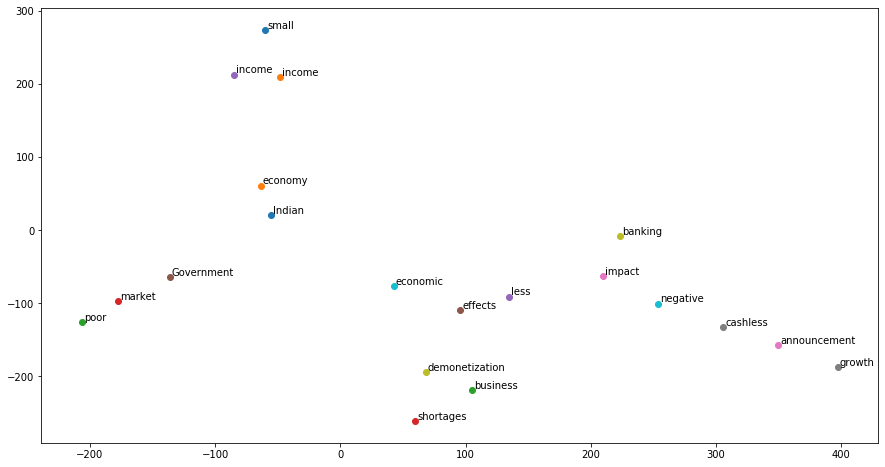

In [116]:
from sklearn.manifold import  TSNE
def tsne_plot(model):
    labels = []
    wordvecs = []
    
    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
        
    tsne_model=TSNE(perplexity=3,n_components=2,init='pca',random_state=42)
    coordinates=tsne_model.fit_transform(wordvecs)
    
    x = []
    y = []
    
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
    print(x)
        
    plt.figure(figsize=(15,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points', ha='left')

    plt.show()

tsne_plot(model)